In [47]:
import pandas as pd
price_df=pd.read_csv(r"C:\Users\Dell\Downloads\mlops\MLOPS\gemstone dataset\train_data.csv\train_data.csv")
print(price_df.head())

   id  carat        cut color clarity  depth  table     x     y     z  price
0   0   1.52    Premium     F     VS2   62.2   58.0  7.27  7.33  4.55  13619
1   1   2.03  Very Good     J     SI2   62.0   58.0  8.06  8.12  5.05  13387
2   2   0.70      Ideal     G     VS1   61.2   57.0  5.69  5.73  3.50   2772
3   3   0.32      Ideal     G     VS1   61.6   56.0  4.38  4.41  2.71    666
4   4   1.70    Premium     G     VS2   62.6   59.0  7.65  7.61  4.77  14453


Introduction About the Data : The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

id : unique identifier of each diamond

carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.

cut : Quality of Diamond Cut

color : Color of Diamond

clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.

depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)

table : A diamond's table is the facet which can be seen when the stone is viewed face up.

x : Diamond X dimension

y : Diamond Y dimension

x : Diamond Z dimension

Target variable:

price: Price of the given Diamond.

EDA


In [17]:
price_df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [18]:
price_df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [19]:
price_df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [20]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [21]:
price_df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [48]:
price_df.drop(['id'],inplace=True,axis=1)
price_df.duplicated().sum()

np.int64(0)

In [32]:
ca_col=price_df.columns[price_df.dtypes=="object"]
num_cols=price_df.columns[price_df.dtypes=="float64"]
ca_col

Index(['cut', 'color', 'clarity'], dtype='object')

In [31]:
for ca in ca_col:
    print(price_df[ca].value_counts())
    print("-----------------------------------")

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64
-----------------------------------
color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64
-----------------------------------
clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64
-----------------------------------


<Figure size 1000x1000 with 0 Axes>

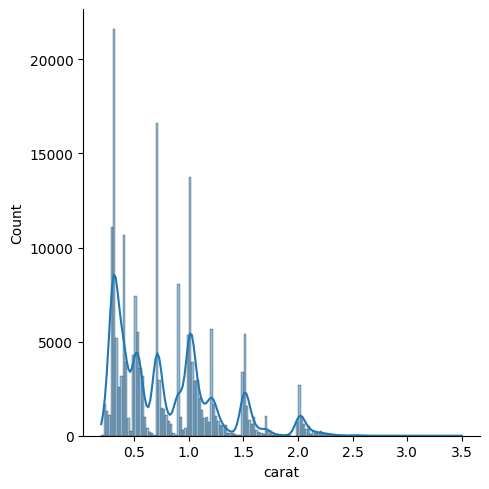

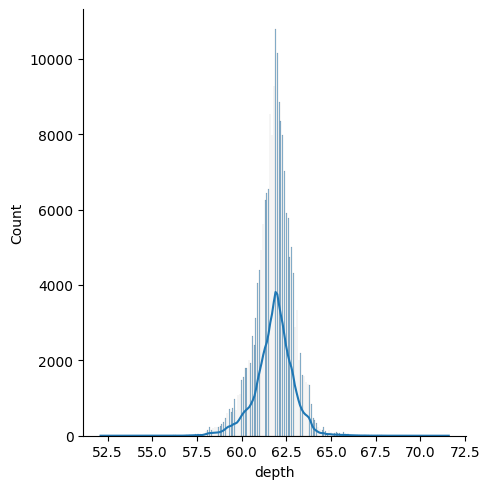

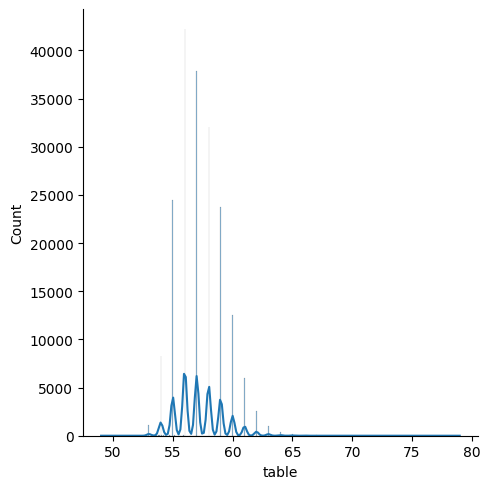

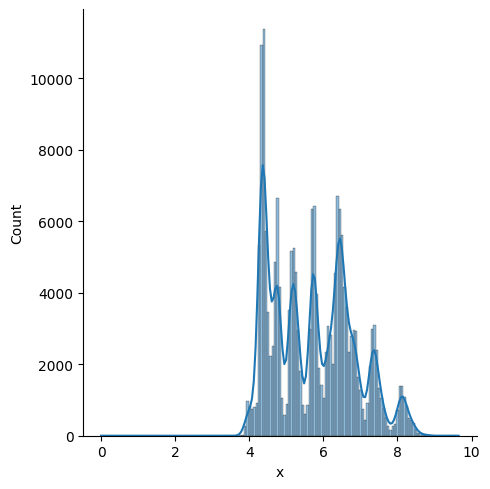

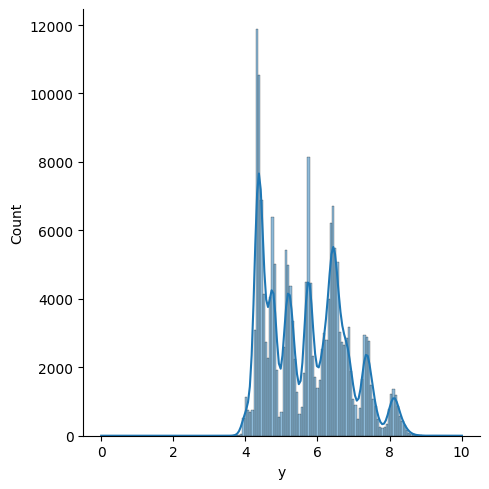

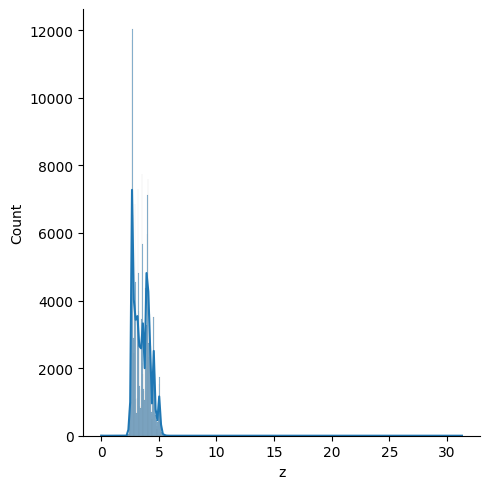

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))

for l in num_cols:
    sns.displot(x=l, data=price_df,kde=True)
    plt.show()


<Axes: >

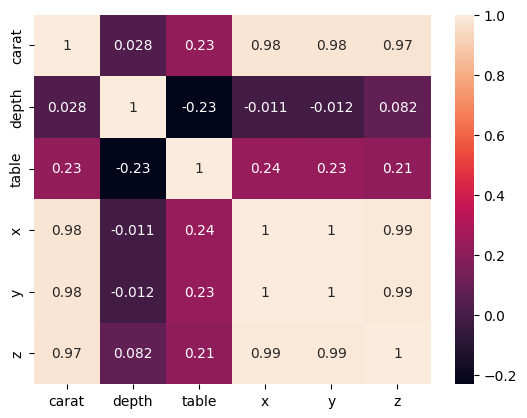

In [34]:
sns.heatmap(price_df[num_cols].corr(),annot=True)

In [49]:
for col in ca_col:
    print(price_df[col].value_counts())
    print("-----------------------------------")

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64
-----------------------------------
color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64
-----------------------------------
clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64
-----------------------------------


In [50]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [51]:
X=price_df.drop(labels=["price"],axis=1)
y=price_df["price"]

In [52]:
cat_cols=X.select_dtypes(include="object").columns
num_cols=X.select_dtypes(exclude="object").columns
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [53]:
num_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer()),
        ("scaler",StandardScaler())
    ]
)

In [54]:
cat_pipeline=Pipeline(

    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("ordinalencoder",OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories]))

    ]
)

In [55]:
preprocessor=ColumnTransformer(

    [
        ("num_pipeline",num_pipeline,num_cols),
        ("cat_pipeline",cat_pipeline,cat_cols)
    ]
)

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30, random_state=42)

In [57]:
preprocessor.fit_transform(X_train)

array([[-0.82314374, -1.12998781, -0.64189666, ...,  4.        ,
         1.        ,  5.        ],
       [ 0.94502267, -1.77782269,  0.92190185, ...,  2.        ,
         4.        ,  4.        ],
       [ 1.9584839 ,  0.16568195,  0.40063568, ...,  3.        ,
         4.        ,  3.        ],
       ...,
       [ 0.92345966,  0.90606467,  0.40063568, ...,  3.        ,
         3.        ,  3.        ],
       [-1.03877378, -0.66724861, -0.64189666, ...,  2.        ,
         3.        ,  6.        ],
       [-1.03877378, -0.01941373,  0.92190185, ...,  2.        ,
         3.        ,  1.        ]], shape=(135501, 9))

In [58]:
preprocessor.fit_transform(X_test)

array([[-0.62636845,  0.25853321, -0.11404195, ...,  4.        ,
         0.        ,  2.        ],
       [ 2.63330214, -2.13900051, -0.11404195, ...,  2.        ,
         3.        ,  1.        ],
       [-1.1261846 , -1.21687215,  0.92772113, ...,  3.        ,
         1.        ,  6.        ],
       ...,
       [-0.82194868, -0.0181053 , -0.63492349, ...,  4.        ,
         3.        ,  6.        ],
       [ 0.9165423 , -0.66359514,  1.44860267, ...,  3.        ,
         5.        ,  2.        ],
       [ 0.48191955,  0.90402306, -0.63492349, ...,  2.        ,
         1.        ,  3.        ]], shape=(58072, 9))

In [59]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [60]:
X_train.head()

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,-0.823144,-1.129988,-0.641897,-0.780451,-0.835103,-0.876024,4.0,1.0,5.0
1,0.945023,-1.777823,0.921902,1.073226,1.166389,0.946633,2.0,4.0,4.0
2,1.958484,0.165682,0.400636,1.703116,1.755063,1.742237,3.0,4.0,3.0
3,-0.995648,-0.574701,-0.641897,-1.122391,-1.161138,-1.165334,4.0,2.0,6.0
4,-0.995648,0.258230,0.400636,-1.176382,-1.152082,-1.136403,2.0,5.0,2.0


In [61]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 985.5 kB/s eta 0:02:07
   ---------------------------------------- 0.8/124.9 MB 882.6 kB/s eta 0:02:21
   ---------------------------------------- 0.8/124.9 MB 882.6 kB/s eta 0:02:21
   ---------------------------------------- 0.8/124.9 MB 882.6 kB/s eta 0:02:21
   ---------------------------------------- 1.0/124.9 MB 699.0 kB/s eta 0:02:58
   ---------------------------------------- 1.3/124.9 MB 729.2 kB/s eta 0:02:50
    --------------------------------------- 1.6/124.9 MB 776.5 kB/s eta 0:02:39
    --------------------------------------- 2.1/124.9 MB 883.1 kB/s eta 0:02:20
    --------------------------------------- 2.4/124.9 MB 938.3 kB/s eta 0:02:11
    --------------------------------------- 2.9/124.9 MB 1.0 MB/s e

In [62]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [63]:
models={

    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'Randomforest':RandomForestRegressor(),
    'xgboost':XGBRegressor()

}

In [64]:
trained_model_list=[]
model_list=[]
r2_list=[]
list(models)

['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet', 'Randomforest', 'xgboost']

In [65]:
def evaluate_model(true,pred):
    r2=r2_score(true,pred)
    mae=mean_absolute_error(true,pred)
    mse=mean_squared_error(true,pred)
    return mae, mse,r2

In [66]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    
    model.fit(X_train,y_train)

    #make_prediction
    y_pred=model.predict(X_test)

    #this is for the validaiton
    MAE,MSE,R2=evaluate_model(y_test,y_pred)


    print("model training performance",model)
    print("MSE:", MSE)
    print("MAE:",MAE)
    print("R2 SCORE:",R2)

    r2_list.append(R2)

    print("="*40)
    print("\n")

model training performance LinearRegression()
MSE: 1029473.3531156847
MAE: 675.0758270067478
R2 SCORE: 0.9362906819996047


model training performance Lasso()
MSE: 1029534.1175907081
MAE: 676.3788803086726
R2 SCORE: 0.9362869215688461


model training performance Ridge()
MSE: 1029482.832981572
MAE: 675.1087261318746
R2 SCORE: 0.9362900953347935


model training performance ElasticNet()
MSE: 2291130.057094769
MAE: 1051.1722281863017
R2 SCORE: 0.8582126162411592


model training performance RandomForestRegressor()
MSE: 374267.6094949156
MAE: 310.5547977155343
R2 SCORE: 0.9768383182737127


model training performance XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=No